In [2]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [3]:
df= pd.read_pickle('../datos/01-df_registrados.pickle')

In [4]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0,1,festivo,1,2,18.18125,80.5833,10.749882,654
1,2018-01-02,invierno,0,1,no festivo,2,2,17.68695,69.6087,16.652113,670
2,2018-01-03,invierno,0,1,no festivo,3,1,9.47025,43.7273,16.636703,1229
3,2018-01-04,invierno,0,1,no festivo,4,1,10.60610,59.0435,10.739832,1454
4,2018-01-05,invierno,0,1,no festivo,5,1,11.46350,43.6957,12.522300,1518


In [5]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
weathersit          category
atemp                float64
hum                  float64
windspeed            float64
registered             int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [6]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['registered'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,registered
0,invierno,408957
1,otoño,711831
2,primavera,715067
3,verano,835038


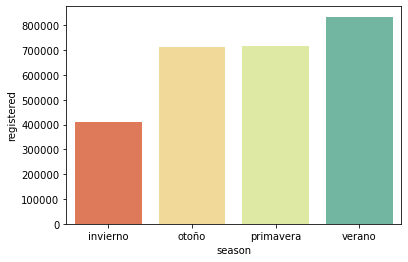

In [7]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [8]:
mapa_season = {'invierno':0, 'primavera':1, 'otoño':1, 'verano':2} 

In [9]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [10]:
holiday = df.groupby('holiday')['registered'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,registered
0,festivo,53777
1,no festivo,2617116


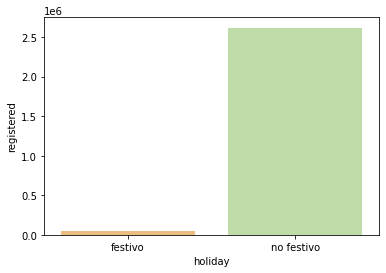

In [11]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [12]:
mapa_holiday = {'festivo':0, 'no festivo':1} 

In [13]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [14]:
df.sample(7)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
660,2019-10-23,1,1,10,1,3,1,26.51520,64.1667,6.334569,6625
395,2019-01-31,0,1,1,1,4,1,19.06585,41.6667,17.541739,4185
376,2019-01-12,0,1,1,1,6,2,19.09690,80.2917,12.124789,3828
18,2018-01-19,0,0,1,1,5,2,14.92110,74.1739,13.957239,1572
259,2018-09-17,2,0,9,1,1,2,23.92560,71.8333,12.708225,3077
54,2018-02-24,0,0,2,1,6,2,14.45955,69.7391,16.783232,1707
265,2018-09-23,1,0,9,1,7,2,26.10625,97.2500,5.250569,2137


---

## WEEKDAY

In [15]:
semana = df.groupby('weekday')['registered'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,registered
0,1,306090
1,2,348041
2,3,396847
3,4,427173
4,5,418467
5,6,410222
6,7,364053


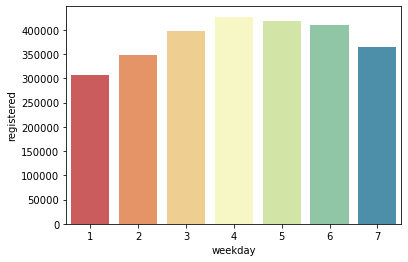

In [16]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [17]:
mapa_weekday = {7:0, 
1:0,
2:1, 
3:2,
4:3, 
5:3,
6:3}

In [18]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [19]:
clima = df.groupby('weathersit')['registered'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,registered
0,1,1811606
1,2,825313
2,3,33974


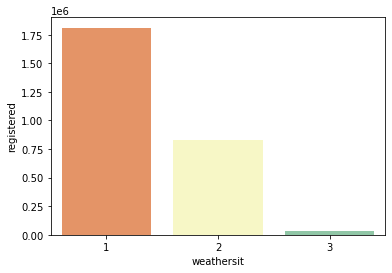

In [20]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [21]:
mapa_weather = {3: 0, 2:1, 1:2}

In [22]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

In [23]:
df.sample(12)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
671,2019-11-03,1,1,11,1,0,1,16.19230,49.1250,18.125443,4109
3,2018-01-04,0,0,1,1,3,2,10.60610,59.0435,10.739832,1454
553,2019-07-08,2,1,7,1,0,2,39.51980,57.3750,8.417143,3469
222,2018-08-11,2,0,8,1,3,2,32.57605,42.3750,11.041332,3980
192,2018-07-12,2,0,7,1,3,2,36.96375,55.9167,13.417018,3596
39,2018-02-09,0,0,2,1,3,1,7.21415,49.4783,12.652213,1552
68,2018-03-10,0,0,3,1,3,0,19.28340,0.0000,17.545759,577
252,2018-09-10,2,0,9,1,0,2,30.39810,75.3750,10.291736,3595
156,2018-06-06,1,0,6,1,2,2,31.09290,60.0000,8.167032,3875
101,2018-04-12,1,0,4,1,3,1,24.65270,73.9167,18.416893,1777


In [24]:
df.to_pickle('../datos/02-df_r_encoding.pk')

In [25]:
df.to_csv('../datos/02-df_r_encoding.csv')